# Optimization Algorithms for Linear Regression
## Stochastic Gradient Descent

In [2]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml

import seaborn as sns

# Apply the default theme
sns.set_theme()

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/pantelis-classes/PRML.git to /tmp/pip-install-m55y9vkt/prml_826d71929c60418281269b2fecf4f170
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /tmp/pip-install-m55y9vkt/prml_826d71929c60418281269b2fecf4f170
  Resolved https://github.com/pantelis-classes/PRML.git to commit 6c7ef85da419a644a4a4feb7ab538d2f4f15d46b
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

np.random.seed(1234)

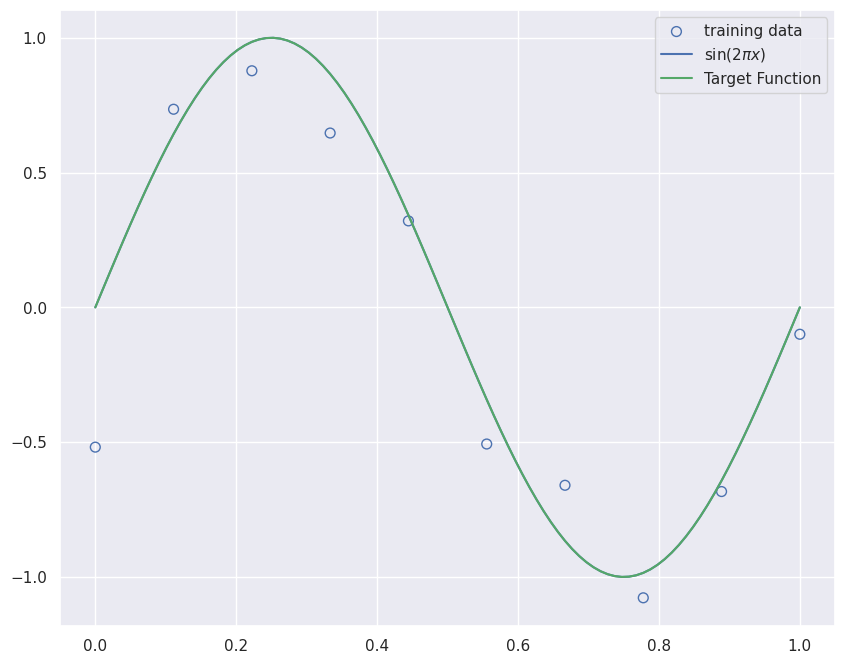

In [4]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()